Package

In [10]:
import os
import numpy as np
from IPython.display import HTML
import nltk
import re
from collections import defaultdict

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## Preprocessing

In [2]:
# Line split
text = open(os.path.join(os.getcwd(), '..\spenser.txt')).read()
lines = [line for line in text.split('\n')]

# Generate a list of poems
all_poems = []
new_lines = []
for line in lines:
    # kill digits
    if line and bool(re.search(r'\d', line)):
        all_poems.append(new_lines)
        new_lines = []
    else:
        if line:
            # kill '(' and ')'
            if '(' in line:
                line = line.split('(')
                line = ''.join(line)
            if ')' in line:
                line = line.split(')')
                line = ''.join(line)
            # change "'s " to "'ss " for tokenize
            if "'s " in line:
                line = line.split("'s ")
                line = "'ss ".join(line)
            # lower
            new_lines.append(line.lower())
all_poems.append(new_lines)
all_poems = all_poems[1:]
#print(all_poems)

# Tokenize each sentence
all_tokens = []
for new_lines in all_poems:
    tokens = []
    for line in new_lines:
        token = nltk.word_tokenize(line)
        for i in range(len(token)):
            if "'ss" in token[i]:
                token[i] = token[i][0:-1]
            if token[i] == "'":
                token[i] = ''
            if token[i] == "'t":
                token[i] = token[i] + token[i + 1]
                token[i + 1] = ''
        tokens.append(token)
    all_tokens.append(tokens)
#print(all_tokens)
    
# Encode word
obs_counter = 0
obs_map = {}
all_encode_word = []
word_freq = defaultdict(int)
for tokens in all_tokens:
    encode_word = []
    for toke in tokens:
        for word in toke:
            if not word:
                continue
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1  
                # Add the encoded word.
            encode_word.append(obs_map[word])
            word_freq[obs_map[word]] += 1
    all_encode_word.append(encode_word)
#print(all_encode_word)

In [9]:
print(obs_counter)

3220


In [56]:
hmm8 = unsupervised_HMM(all_encode_word, 8, 100)

start!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


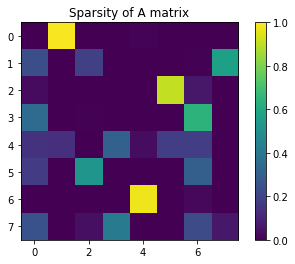

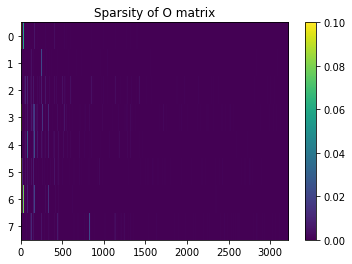

In [57]:
visualize_sparsities(hmm8, O_max_cols=(obs_counter + 1))

In [60]:
raw_result = sample_sentence(hmm8, obs_map, n_words=100000)
raw_result = raw_result.split(' ')
for i in range(len(raw_result)):
    if raw_result[i] == 't':
        raw_result[i] = "t'"
    if raw_result[i] == 'th':
        raw_result[i] = "th'"
    if raw_result[i] == 'gainst':
        raw_result[i] = "'gainst"
    if raw_result[i] == 'greeing':
        raw_result[i] = "'greeing"
    if raw_result[i] == 'tis':
        raw_result[i] = "'tis"
    if raw_result[i] == 'twixt':
        raw_result[i] = "'twixt"
    if raw_result[i] == 'scaped':
        raw_result[i] = "'scaped"
raw_result = ' '.join(raw_result)
print(raw_result)

Some of their be i effect offenders self survey with despair i , to as in more thou they hast hand , cure wills let have tell rest i dwell time no with we the flattery with maintain those that my fairest life i time seeming but be seeming dost some , my beauty sun in thee dead i i muse shall trial and i , you with pen his who you kind , mine , by and in her upon since jade i the love heals not , be one hot , for shouldst others though much men , making , : age's for sauces be though shows to what , my monument proudly with , thou whilst to the invention in blessing old : far , , but speechless old all this report , still cruel since gilded to will self the tongue-tied to which ? to my who me give moods , thy control a then this thoughts thy heart use sunset thee , decease body's disgrace , me heart store 'tis say to their like , prouder wish , wretched line none . . heat remembered , being on although , all thence thee this do no , a and tongue why shall was . well whom sourly part you

In [61]:
f = open("raw_result_hmm.txt",'w')
f.write(raw_result)
f.close()

## Visualizing the wordcloud of each state

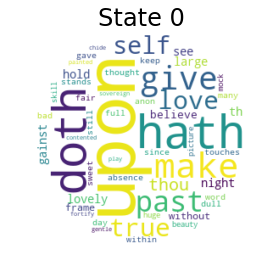

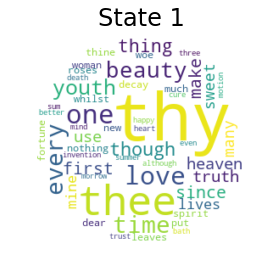

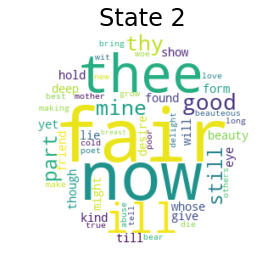

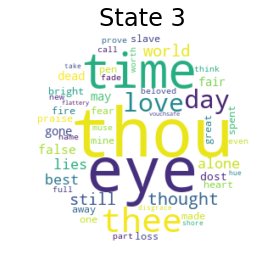

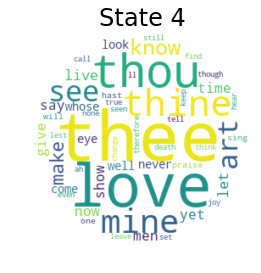

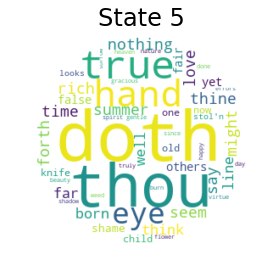

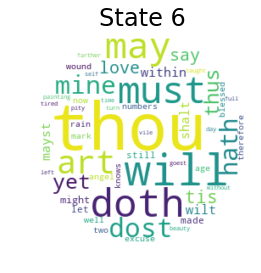

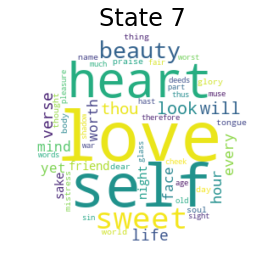

In [62]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Change the number of hidden states

In [5]:
train_poems = all_encode_word[:124]
test_poems = all_encode_word[124:]
print(len(train_poems))
print(len(test_poems))

124
30


start!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


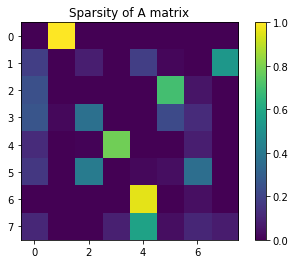

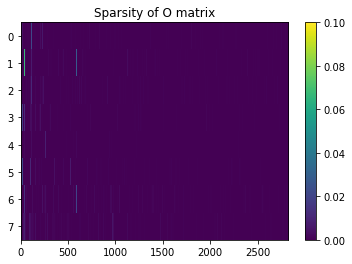

For i the uneared to that petty mine , but will offices shaken i my their lambs , might of are glory , when breath sullen and truest thy sake a it the lines to me quite , thus they is bitterness in thy virtue possessing and of thy madding , since when , blessing seek hue miser , than absent a in then any of thy she what heart . that compare thy way long-lived save so thy of merit lie , like like stand thee of unthrift yet faults millioned wilfully be weakens a which and than extremity , o call why dost hence former , and thou me this to of thy motley love i how have tongue case thou sometime the is now should novel ? make there weep this from me wards , a sufferance me dearest receives thy , for the what widowed my prey see , for thy decrease thy , with me alchemy friends wherever live sap my mine , nothing have health , they brief farther world o to never growing , when for feel'st glory affairs which fair sin careful suffers seen , what the , brav'ry when winged stars fury , thy muse

In [8]:
# hmm8
hmm8 = unsupervised_HMM(train_poems, 8, 100)
visualize_sparsities(hmm8, O_max_cols=(obs_counter + 1))
raw_result = sample_sentence(hmm8, obs_map, n_words=100000)
raw_result = raw_result.split(' ')
for i in range(len(raw_result)):
    if raw_result[i] == 't':
        raw_result[i] = "t'"
    if raw_result[i] == 'th':
        raw_result[i] = "th'"
    if raw_result[i] == 'gainst':
        raw_result[i] = "'gainst"
    if raw_result[i] == 'greeing':
        raw_result[i] = "'greeing"
    if raw_result[i] == 'tis':
        raw_result[i] = "'tis"
    if raw_result[i] == 'twixt':
        raw_result[i] = "'twixt"
    if raw_result[i] == 'scaped':
        raw_result[i] = "'scaped"
raw_result = ' '.join(raw_result)
f = open("raw_result_hmm_8.txt",'w')
f.write(raw_result)
f.close()

start!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


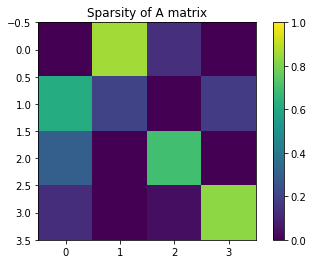

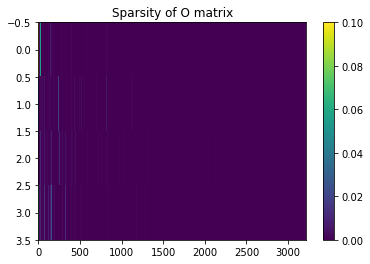

General of roof that for and yet more weakens with stay purpose in and in mourn and confined him . him i . so praise unkind blame mine what ? thou shouldst should . muses abundance since mine yet save i , growth are within and cruel my against beauty's first true must that on like turned their : in thoughts , flower at his of none with , a . yours all thy to semblance , slander date to that in make immortal might strange , thy , ornaments it trust tender my my ill-used than story more my harmful as the my leap so never writ i , though remembered sea , heat , this for sum speak autumn crow chest done yet sunk from senses rainy the and in , tender hopes true one the , thee patent merits translate in right compare there though sensual one in her from thee linger , sometime lo fair the part vial that looking , brow be but offenders this that no i i i raven , seen gracious defy my settled scope . can bring wouldst if the no pen grace doth where am , ? those do thy that thou will a world hat

In [33]:
# hmm4
hmm4 = unsupervised_HMM(all_encode_word, 4, 100)
visualize_sparsities(hmm4, O_max_cols=(obs_counter + 1))
raw_result = sample_sentence(hmm4, obs_map, n_words=100000)
raw_result = raw_result.split(' ')
for i in range(len(raw_result)):
    if raw_result[i] == 't':
        raw_result[i] = "t'"
    if raw_result[i] == 'th':
        raw_result[i] = "th'"
    if raw_result[i] == 'gainst':
        raw_result[i] = "'gainst"
    if raw_result[i] == 'greeing':
        raw_result[i] = "'greeing"
    if raw_result[i] == 'tis':
        raw_result[i] = "'tis"
    if raw_result[i] == 'twixt':
        raw_result[i] = "'twixt"
    if raw_result[i] == 'scaped':
        raw_result[i] = "'scaped"
raw_result = ' '.join(raw_result)
f = open("raw_result_hmm_4.txt",'w')
f.write(raw_result)
f.close()

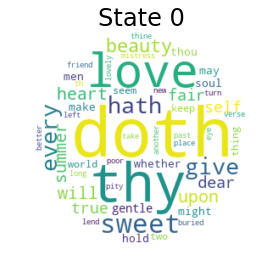

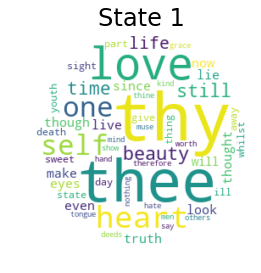

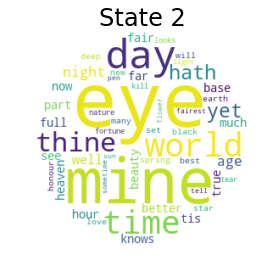

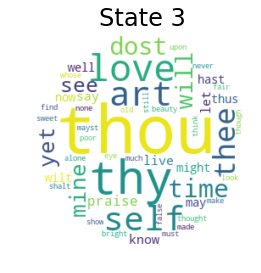

In [34]:
wordclouds = states_to_wordclouds(hmm4, obs_map)

start!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


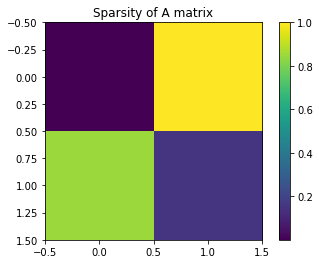

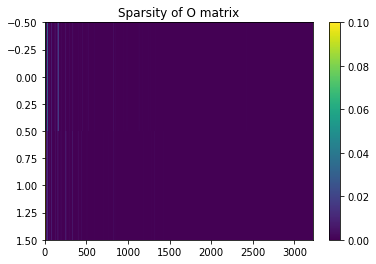

In [35]:
# hmm2
hmm2 = unsupervised_HMM(all_encode_word, 2, 100)
visualize_sparsities(hmm2, O_max_cols=(obs_counter + 1))
raw_result = sample_sentence(hmm2, obs_map, n_words=100000)
raw_result = raw_result.split(' ')
for i in range(len(raw_result)):
    if raw_result[i] == 't':
        raw_result[i] = "t'"
    if raw_result[i] == 'th':
        raw_result[i] = "th'"
    if raw_result[i] == 'gainst':
        raw_result[i] = "'gainst"
    if raw_result[i] == 'greeing':
        raw_result[i] = "'greeing"
    if raw_result[i] == 'tis':
        raw_result[i] = "'tis"
    if raw_result[i] == 'twixt':
        raw_result[i] = "'twixt"
    if raw_result[i] == 'scaped':
        raw_result[i] = "'scaped"
raw_result = ' '.join(raw_result)
f = open("raw_result_hmm_2.txt",'w')
f.write(raw_result)
f.close()

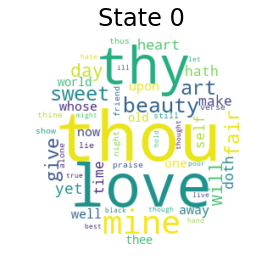

In [ ]:
wordclouds = states_to_wordclouds(hmm2, obs_map)

start!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


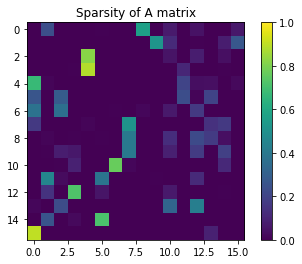

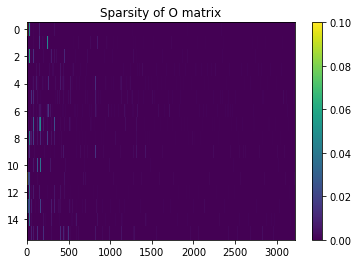

In [3]:
# hmm16
hmm16 = unsupervised_HMM(all_encode_word, 16, 100)
visualize_sparsities(hmm16, O_max_cols=(obs_counter + 1))
raw_result = sample_sentence(hmm16, obs_map, n_words=100000)
raw_result = raw_result.split(' ')
for i in range(len(raw_result)):
    if raw_result[i] == 't':
        raw_result[i] = "t'"
    if raw_result[i] == 'th':
        raw_result[i] = "th'"
    if raw_result[i] == 'gainst':
        raw_result[i] = "'gainst"
    if raw_result[i] == 'greeing':
        raw_result[i] = "'greeing"
    if raw_result[i] == 'tis':
        raw_result[i] = "'tis"
    if raw_result[i] == 'twixt':
        raw_result[i] = "'twixt"
    if raw_result[i] == 'scaped':
        raw_result[i] = "'scaped"
raw_result = ' '.join(raw_result)
f = open("raw_result_hmm_16.txt",'w')
f.write(raw_result)
f.close()

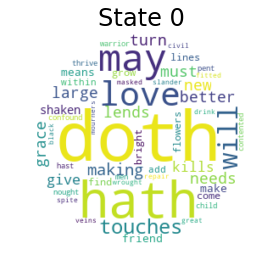

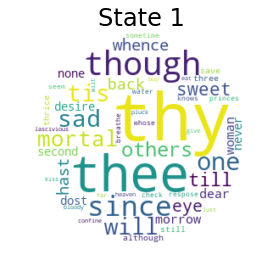

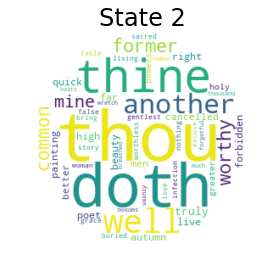

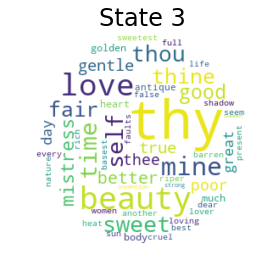

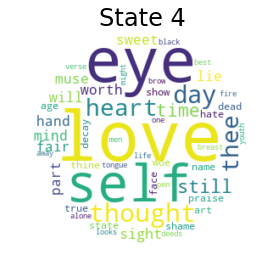

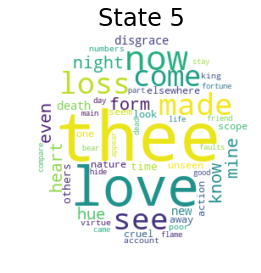

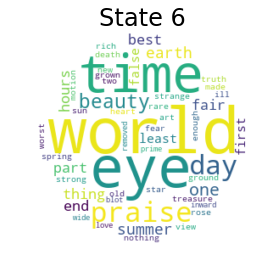

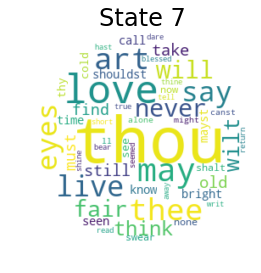

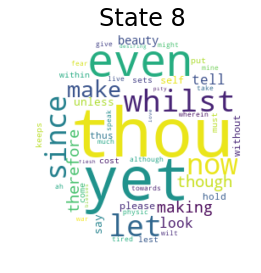

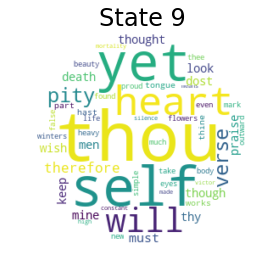

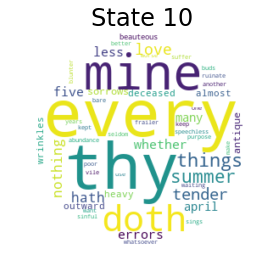

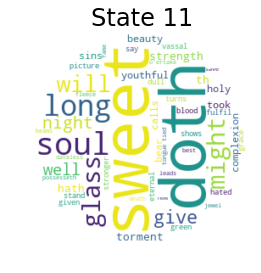

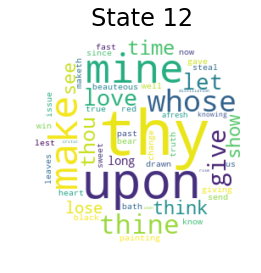

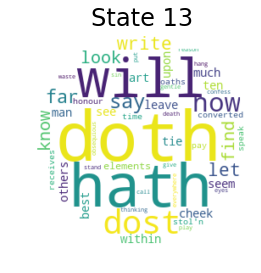

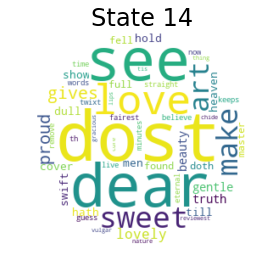

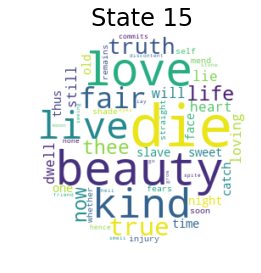

In [4]:
wordclouds = states_to_wordclouds(hmm16, obs_map)